<a href="https://colab.research.google.com/github/sjahnavia/Personality-Prediction-using-big-five-traits/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Getting started.pdf
/content/drive/MyDrive/Screenshot_2020-07-22-21-27-27-706_com.android.browser.jpg
/content/drive/MyDrive/bhavishya.pdf
/content/drive/MyDrive/conflict management.pptx
/content/drive/MyDrive/JPEG_20220102_123430_compress48.jpg
/content/drive/MyDrive/Bhavishya (1).pdf
/content/drive/MyDrive/Bhavishya (1).gdoc
/content/drive/MyDrive/Copy of M.Bhavishya resume (1).gdoc
/content/drive/MyDrive/Copy of M.Bhavishya resume.pdf
/content/drive/MyDrive/CHANDINI.gdoc
/content/drive/MyDrive/CHANDINI (1).pdf
/content/drive/MyDrive/CHANDINI (1).gdoc
/content/drive/MyDrive/Copy of M.Bhavishya resume.gdoc
/content/drive/MyDrive/SRUNI RESUME.gdoc
/content/drive/MyDrive/Untitled document (1).gdoc
/content/drive/MyDrive/ABSTRACT.gdoc
/content/drive/MyDrive/sirishya.mp4
/content/drive/MyDrive/TITLE:   PREDICTION OF PERSONALITY.gdoc
/content/drive/MyDrive/Scan 07 May 22 · 03·15·36.pdf
/content/drive/MyDrive/text.html
/content/drive/MyDrive/output.csv
/content/drive/

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
train_length = len(df_train)
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df_train.rename(columns = {'Personality (Class label)':'Personality'}, inplace = True) 
df_test.rename(columns = {'Personality (class label)':'Personality'}, inplace = True) 
df = pd.concat([df_train, df_test])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


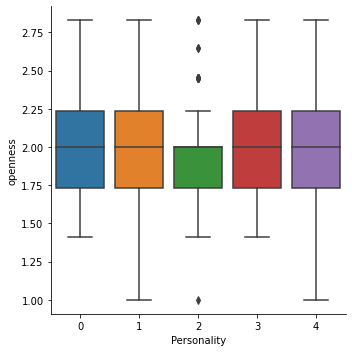

In [ ]:
sns.catplot(x="Personality", y="openness", kind="box", data=df)

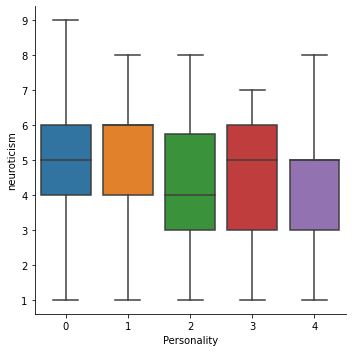

In [ ]:
sns.catplot(x="Personality", y="neuroticism", kind="box", data=df)

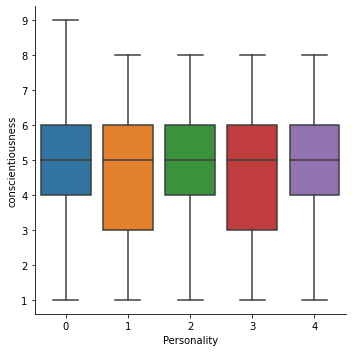

In [ ]:
sns.catplot(x="Personality", y="conscientiousness", kind="box", data=df)

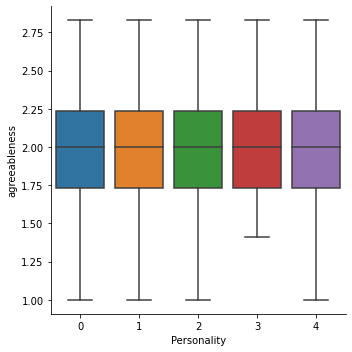

In [ ]:
sns.catplot(x="Personality", y="agreeableness", kind="box", data=df)

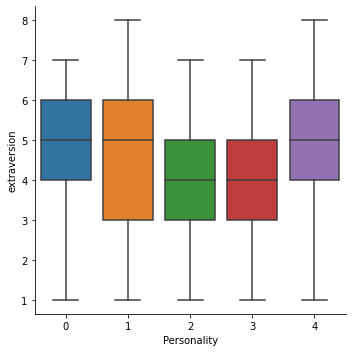

In [ ]:
sns.catplot(x="Personality", y="extraversion", kind="box", data=df)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})

df['Personality'] = df['Personality'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})

In [ ]:
df[df.isnull().sum(axis=1) > 0]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,NaN,17,1.414214,4,7,2.449490,2,NaN
1,NaN,19,2.236068,5,4,1.732051,6,NaN
2,NaN,18,1.414214,6,4,2.000000,5,NaN
3,NaN,22,2.000000,6,7,2.236068,3,NaN
4,NaN,19,1.414214,4,6,2.000000,4,NaN
...,...,...,...,...,...,...,...,...
310,NaN,19,1.732051,5,6,2.236068,3,NaN
311,NaN,18,2.645751,5,8,2.449490,7,NaN
312,NaN,18,1.414214,5,6,2.645751,7,NaN
313,NaN,23,1.732051,7,5,2.236068,3,NaN


In [ ]:
df.groupby(by=['Personality', 'Age']).mean().loc[4]

KeyError: ignored

In [ ]:
df.at[449, 'Gender'] = 0

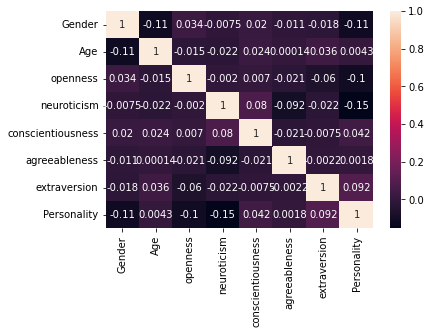

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.skew()

Gender              -0.093991
Age                  0.471614
openness            -0.638642
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness       -0.552094
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [ ]:
df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
df.skew()

Gender              -0.093991
Age                  0.471614
openness             0.234889
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness        0.107320
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [ ]:
df_train = df[:train_length]
df_test = df[train_length:]
Y, X = df_train.values[:,-1], df_train.values[:,:-1]
Y_test, X_test = df_test.values[:,-1], df_test.values[:,:-1]
X = RobustScaler().fit_transform(X)
X_test = RobustScaler().fit_transform(X_test)

In [ ]:
df_train['Personality'].value_counts() / len(df_train)

4    0.227080
1    0.211566
0    0.194640
2    0.188999
3    0.177715
Name: Personality, dtype: float64

In [ ]:
df_test['Personality'].value_counts() / len(df_test)

4    0.485714
1    0.244444
3    0.126984
2    0.076190
0    0.066667
Name: Personality, dtype: float64

In [ ]:
param_grids = {}
models = []

logistic = LogisticRegression()
models.append(logistic)
param_grids[logistic] = {'C':np.arange(0.01, 1, 0.01)}

svc = SVC()
models.append(svc)
param_grids[svc] = {'kernel':['poly','rbf'],
                    'C':np.arange(0.01, 1, 0.01)}

adaboost = AdaBoostClassifier()
models.append(adaboost)
param_grids[adaboost] = {'n_estimators':np.arange(10, 101, 10)}

knn = KNeighborsClassifier()
models.append(knn)
param_grids[knn] = {'n_neighbors':np.arange(2,11,1),
                    'weights':['uniform', 'distance'],
                    'p':np.arange(1,4,1)}

NameError: ignored

In [ ]:
def choose_hyperparameters(models, param_grids, X_train, Y_train):
    cv_models = {}
    scores = {}
    cv_with_scores = {}
    for model in models:
        label = str(type(model)).split('.')[-1].split("'")[0]
        gs = GridSearchCV(model, param_grid=param_grids[model])
        gs.fit(X_train, Y_train)
        cv_models[label] = gs
        scores[label] = gs.best_score_
        cv_with_scores[gs] = gs.best_score_
    return cv_models, scores, cv_with_scores

cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)
scores

{'AdaBoostClassifier': 0.2820497452801918,
 'KNeighborsClassifier': 0.272270502447308,
 'LogisticRegression': 0.23975626810508438,
 'SVC': 0.263779842173609}

In [ ]:
def relabel_personality(x):
    if x == 0 or x == 3:
        return 1
    else:
        return 0

relabel_personality_v = np.vectorize(relabel_personality)

Y = relabel_personality_v(Y)
Y_test = relabel_personality_v(Y_test)

cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)
scores

{'AdaBoostClassifier': 0.6248326840475477,
 'KNeighborsClassifier': 0.6192088702427331,
 'LogisticRegression': 0.6276495854559985,
 'SVC': 0.6304764758765359}

In [ ]:
def get_oof_predictions(model, X_train, Y_train, kf):
    m = len(X_train)
    oof_predictions = np.empty((m,))
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X[train_index], X[val_index] 
        Y_tr = Y[train_index]
        model.fit(X_tr, Y_tr)
        oof_predictions[val_index] = model.predict(X_val)
    return oof_predictions
        
def train_metamodel(metamodels, param_grids, models, X_train, Y_train, k):
    m = len(X_train)
    kf = KFold(n_splits=k)
    models_predictions = np.zeros(m)
    for model in models:
        oof_predictions = get_oof_predictions(model, X_train, Y_train, kf)
        models_predictions = np.column_stack((models_predictions, oof_predictions))
    models_predictions = models_predictions[:, 1:]
    cv_models, scores, cv_with_scores = choose_hyperparameters(metamodels, 
                                                               param_grids, 
                                                               models_predictions, 
                                                               Y_train)
    metamodel = max(cv_with_scores, key=cv_with_scores.get)
    return metamodel

def predict_with_models(models, X):
    m = len(X)
    models_predictions = np.zeros(m)
    for model in models:
        model_predictions = model.predict(X)
        models_predictions = np.column_stack((models_predictions, model_predictions))
    return models_predictions[:, 1:]

In [ ]:
metamodels = models.copy()
models = list(cv_models.values())
metamodel = train_metamodel(metamodels, param_grids, models, X, Y, 5)
Y_pred = predict_with_models(models, X_test)
metamodel_test_score = metamodel.score(Y_pred, Y_test)
metamodel_test_score

0.8063492063492064

In [ ]:
metamodel.best_score_

0.6304764758765359

In [ ]:
np.unique(Y_test, return_counts = True)

(array([0, 1]), array([254,  61]))

In [ ]:
np.unique(Y, return_counts = True)

(array([0, 1]), array([445, 264]))

In [ ]:
np.unique(metamodel.predict(Y_pred), return_counts = True)

(array([0, 1]), array([313,   2]))